<a href="https://colab.research.google.com/github/ThakareU/Copy-of-Class-data.ipynb/blob/main/Polynomial_regression_using_drug_concentration_absorption_project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Polynomial regression using drug_concentration_absorption project-4**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drug = pd.read_csv("drug_concentration_absorption.csv")

In [3]:
drug. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Drug_Concentration_mg_L  1920 non-null   float64
 1   Absorption_Rate_percent  1880 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [4]:
drug.isnull().sum()

,0
Drug_Concentration_mg_L,80
Absorption_Rate_percent,120


<Axes: ylabel='Drug_Concentration_mg_L'>

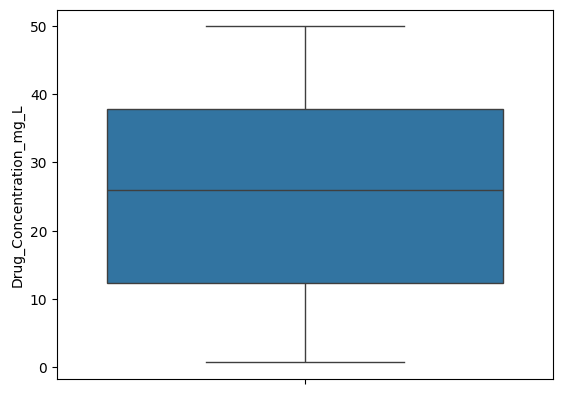

In [5]:
sns.boxplot(drug['Drug_Concentration_mg_L'])

In [6]:
drug['Drug_Concentration_mg_L']=drug['Drug_Concentration_mg_L'].fillna(drug['Drug_Concentration_mg_L'].median())

In [7]:
drug['Drug_Concentration_mg_L'].isnull().sum()

np.int64(0)

<Axes: ylabel='Absorption_Rate_percent'>

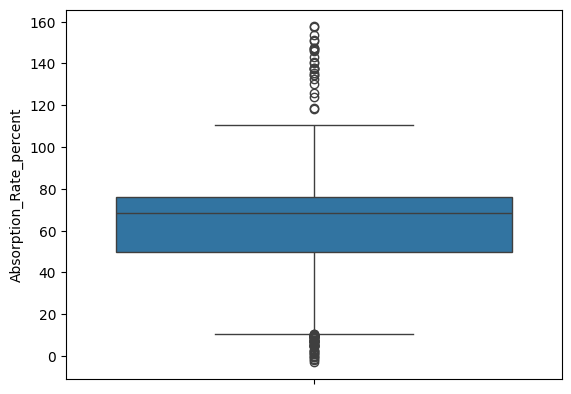

In [8]:
sns.boxplot(drug['Absorption_Rate_percent'])

In [9]:
drug['Absorption_Rate_percent']=drug['Absorption_Rate_percent'].fillna(drug['Absorption_Rate_percent'].median())

In [10]:
drug['Absorption_Rate_percent'].isnull().sum()

np.int64(0)

In [37]:
X = drug  [['Drug_Concentration_mg_L']]

In [38]:
y= drug ['Absorption_Rate_percent']

In [39]:
X

,Drug_Concentration_mg_L
0,19.039736
1,47.560358
2,36.733700
3,30.133595
4,8.222923
...,...
1995,33.019280
1996,47.852424
1997,3.913422
1998,3.324209


In [40]:
y

,Absorption_Rate_percent
0,58.168668
1,68.648804
2,74.632829
3,74.656543
4,68.648804
...,...
1995,153.358465
1996,72.702190
1997,21.325193
1998,16.023715


In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly=PolynomialFeatures(degree=2, include_bias=True)

In [43]:

X_poly = poly.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2, random_state=42)

In [48]:
X_train.shape

(1600, 3)

In [49]:
X_test.shape

(400, 3)

In [50]:
y_train.shape

(1600,)

In [51]:
y_test.shape

(400,)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model=LinearRegression()

In [55]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_predict = model.predict(X_test)

In [57]:
from sklearn.metrics import mean_absolute_error

In [58]:
result = mean_absolute_error(y_test, y_predict)

In [59]:
result

6.155175828321927

In [60]:
new_concentration = [[25]]

In [61]:
result = poly.transform(new_concentration)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [62]:
prediction = model.predict(result)

In [63]:
print(prediction)

[70.19104777]
